## Worldwide University Rankings

The objective of this dataset analysis is to explore and understand the factors influencing the rankings of universities worldwide. By examining various attributes such as overall score, teaching quality, research environment, industry impact, and international outlook, we aim to uncover insights into the characteristics that contribute to a university's standing in the global academic landscape. Through comprehensive data analysis and visualization techniques, we seek to identify patterns, trends, and correlations among the different factors and rankings. 

Ultimately, our goal is to gain a deeper understanding of the factors that drive university rankings and provide valuable insights for stakeholders in the education sector, policymakers, and academic institutions seeking to enhance their performance and global competitiveness.

The dataset is from kaggle - https://www.kaggle.com/datasets/raymondtoo/the-world-university-rankings-2016-2024.

Throughout this notebook, we will explore various aspects of the project:

- Data Collection 
- Data Preprocessing and Exploratory Data Analysis (Visualizations)
- Feature Selection
- Model Building
- Model Evaluation and Interpretation

#### Import libraries

In [1]:
import pandas as pd
import zipfile
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

#### Data

In [2]:
# downloading dataset with kaggle api

# !kaggle datasets download -d raymondtoo/the-world-university-rankings-2016-2024

In [3]:
# reading in and extracting dataset

# file_name = "the-world-university-rankings-2016-2024.zip"
# with zipfile.ZipFile(file_name, "r") as file:
#     file.extractall()

In [4]:
# read in extracted dataset with pandas

rankings = pd.read_csv("THE World University Rankings 2016-2024.csv", encoding='latin1')
rankings.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


#### Data Preparation/Cleaning

In [5]:
# dataset info

rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     12430 non-null  float64
 1   Name                     12430 non-null  object 
 2   Country                  12430 non-null  object 
 3   Student Population       12430 non-null  int64  
 4   Students to Staff Ratio  12430 non-null  float64
 5   International Students   12430 non-null  object 
 6   Female to Male Ratio     11839 non-null  object 
 7   Overall Score            12430 non-null  float64
 8   Teaching                 12430 non-null  float64
 9   Research Environment     12430 non-null  float64
 10  Research Quality         12430 non-null  float64
 11  Industry Impact          12430 non-null  float64
 12  International Outlook    12430 non-null  float64
 13  Year                     12430 non-null  int64  
dtypes: float64(8), int64(2

In [6]:
rankings.shape

(12430, 14)

In [7]:
#checking for any missing values

rankings.isnull().sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio       591
Overall Score                0
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact              0
International Outlook        0
Year                         0
dtype: int64

In [8]:
# checking the percentage of missing values

missing = pd.DataFrame(rankings.isna().sum(), columns = ["NA"])
missing["Percentage"] = missing["NA"].apply(lambda x : str(np.round(x/len(rankings),2)*100)+"%")
missing

,NA,Percentage
Rank,0,0.0%
Name,0,0.0%
Country,0,0.0%
Student Population,0,0.0%
Students to Staff Ratio,0,0.0%
International Students,0,0.0%
Female to Male Ratio,591,5.0%
Overall Score,0,0.0%
Teaching,0,0.0%
Research Environment,0,0.0%


Seeing as the missing values in the Female to Male Ratio column make up only 5% of the total dataset which can be considered insignificant, it will be dropped asI'd rather not fill it with random numbers.

In [9]:
# drop empty rows

rankings.dropna(inplace=True)

# check empty rows have been dropped

rankings.isnull().sum()

Rank                       0
Name                       0
Country                    0
Student Population         0
Students to Staff Ratio    0
International Students     0
Female to Male Ratio       0
Overall Score              0
Teaching                   0
Research Environment       0
Research Quality           0
Industry Impact            0
International Outlook      0
Year                       0
dtype: int64

The Female to Male Ratio column has entries in the wrong format

In [10]:
rankings.iloc[158:164,5:7]

,International Students,Female to Male Ratio
171,33%,54:46:00
172,28%,54:46:00
173,10%,62:38:00
174,12%,54:46:00
175,14%,0.847916667
177,5%,55:45:00


In [11]:
# Function to convert floating-point values to ratio format
def convert_to_ratio(value):
    if '.' in value:
        # Convert floating point values to ratio format
        ratio_value = '{:.0f}:{}'.format(float(value) * 100, 100 - (float(value) * 100))
        return ratio_value
    else:
        return value  # Return unchanged for ratio format values

# Apply the function to the 'Female to Male Ratio' column
rankings["Female to Male Ratio"] = rankings["Female to Male Ratio"].apply(convert_to_ratio)

In [12]:
# split the ration into new columns for females, males
rankings[['F_Stds_Ratio', 'M_Stds_Ratio', "Error"]] = rankings['Female to Male Ratio'].str.split(':', expand=True)

# convert new columns to float values to be able to perform numerical analysis
rankings['F_Stds_Ratio'] = rankings['F_Stds_Ratio'].astype(float)
rankings['M_Stds_Ratio'] = rankings['M_Stds_Ratio'].astype(float)

# new columns for the population of female and male students 
rankings["Female Students"] = ((rankings["F_Stds_Ratio"]*rankings["Student Population"])/(rankings["M_Stds_Ratio"]+rankings["F_Stds_Ratio"])).round()
rankings["Male Students"] = rankings["Student Population"] - rankings["Female Students"]

# drop irrelevant columns
rankings = rankings.drop(["Error","F_Stds_Ratio",'M_Stds_Ratio', 'Female to Male Ratio'], axis = 1)

# create a new female to male ratio column
rankings['Female to Male Ratio'] = (rankings['Female Students'] / rankings['Male Students']).apply(lambda x: '{:.0f}:{:.0f}'.format(x * 100, 100 - (x * 100)))

rankings.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Students,Male Students,Female to Male Ratio
0,1.0,California Institute of Technology,United States,2243,6.9,26%,95.2,95.6,97.6,99.8,97.8,64.0,2016,740.0,1503.0,49:51
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,94.2,86.5,98.9,98.8,73.1,94.4,2016,9163.0,10757.0,85:15
2,3.0,Stanford University,United States,15596,7.8,22%,93.9,92.5,96.2,99.9,63.3,76.3,2016,6550.0,9046.0,72:28
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,92.8,88.2,96.7,97.0,55.0,91.5,2016,8653.0,10157.0,85:15
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,92.0,89.4,88.6,99.7,95.4,84.0,2016,4097.0,6977.0,59:41


In [13]:
#Converting the International Students from character  to numeric values

rankings["International Students"] = rankings["International Students"].apply(lambda x : pd.to_numeric(x.strip("%")))

# create a new column for the international students population 

rankings["Number International Students"] = np.round(rankings["Student Population"] * (rankings["International Students"] / 100))

rankings = rankings.drop(['International Students'], axis=1)
rankings = rankings.rename(columns={"Number International Students": "International Students"})

In [14]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11839 entries, 0 to 12429
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     11839 non-null  float64
 1   Name                     11839 non-null  object 
 2   Country                  11839 non-null  object 
 3   Student Population       11839 non-null  int64  
 4   Students to Staff Ratio  11839 non-null  float64
 5   Overall Score            11839 non-null  float64
 6   Teaching                 11839 non-null  float64
 7   Research Environment     11839 non-null  float64
 8   Research Quality         11839 non-null  float64
 9   Industry Impact          11839 non-null  float64
 10  International Outlook    11839 non-null  float64
 11  Year                     11839 non-null  int64  
 12  Female Students          11839 non-null  float64
 13  Male Students            11839 non-null  float64
 14  Female to Male Ratio     11

In [15]:
rankings.isnull().sum()

Rank                       0
Name                       0
Country                    0
Student Population         0
Students to Staff Ratio    0
Overall Score              0
Teaching                   0
Research Environment       0
Research Quality           0
Industry Impact            0
International Outlook      0
Year                       0
Female Students            0
Male Students              0
Female to Male Ratio       0
International Students     7
dtype: int64

After converting the International Students column from object dtype to float, there appear to be some missing entries. The mean() will be used to fill the few missing values.

In [16]:
mean_value = rankings["International Students"].mean()
rankings["International Students"].fillna(mean_value, inplace=True)


/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_48736/3531895250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rankings["International Students"].fillna(mean_value, inplace=True)


In [17]:
rankings.isnull().sum()

Rank                       0
Name                       0
Country                    0
Student Population         0
Students to Staff Ratio    0
Overall Score              0
Teaching                   0
Research Environment       0
Research Quality           0
Industry Impact            0
International Outlook      0
Year                       0
Female Students            0
Male Students              0
Female to Male Ratio       0
International Students     0
dtype: int64

In [18]:
rankings.describe()

,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Students,Male Students,International Students
count,11839.000000,1.183900e+04,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,11839.000000,1.183900e+04,11839.000000
mean,747.657572,2.332442e+04,19.024960,34.950408,28.145688,23.580666,48.886409,45.862321,47.607864,2020.677338,12140.198328,1.118422e+04,2245.836038
std,468.238904,3.567220e+04,17.350968,16.674716,13.694212,17.213906,27.519606,18.219073,23.021536,2.478756,17069.349439,1.933604e+04,2826.889693
min,1.000000,2.500000e+01,0.300000,8.222500,8.200000,0.800000,0.700000,0.000000,7.100000,2016.000000,15.000000,-6.090000e+02,0.000000
25%,359.000000,1.003200e+04,12.400000,21.551250,18.700000,11.500000,24.200000,35.200000,28.300000,2019.000000,5077.500000,4.820000e+03,359.000000
50%,703.000000,1.761300e+04,16.400000,32.087500,24.100000,17.700000,47.000000,39.300000,43.300000,2021.000000,9136.000000,8.214000e+03,1210.000000
75%,1090.000000,2.903100e+04,22.200000,44.564750,33.300000,29.500000,72.400000,51.000000,63.700000,2023.000000,15051.000000,1.344250e+04,3154.000000
max,1904.000000,1.824383e+06,865.800000,98.457500,99.000000,100.000000,100.000000,100.000000,100.000000,2024.000000,747997.000000,1.076386e+06,29281.000000


The data cleaning process involved checking for and filling missing values, making calculations and creating new relevant columns while dropping irrelevant columns, and changing data types. The "ranking" dataframe is now free of missing and irrelugar data and ready for exploration.

### Exploratory Data Analysis

A barplot shows the top 10 Countries with the most number of universities from 2016 - 2024. The Unites States tops the chart having the most number of universities (1,454), followed by the United Kingdom (869) which is closely followed by Japan (857) 

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_48736/274175185.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


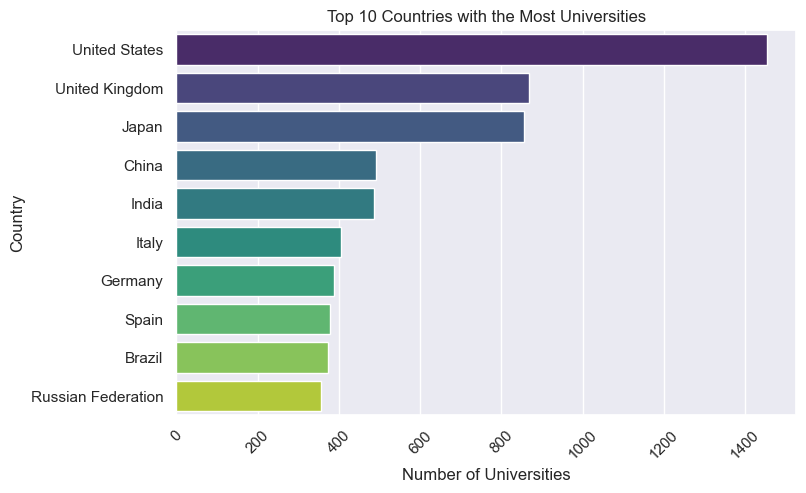

In [19]:
uni_count_per_country = rankings['Country'].value_counts()

top_countries = uni_count_per_country.head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

plt.title('Top 10 Countries with the Most Universities')
plt.xlabel('Number of Universities')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

Based on the findings from the Top 7 Countries with the most universities, it is understandable that universities in the United States and the United Kingdom top the chart when ranked by the overall score metric

/var/folders/xy/b785rtgn795129srfj5kb0mc0000gn/T/ipykernel_48736/3426695121.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Name', y='Overall Score', data=top_universities_2021, palette='viridis')


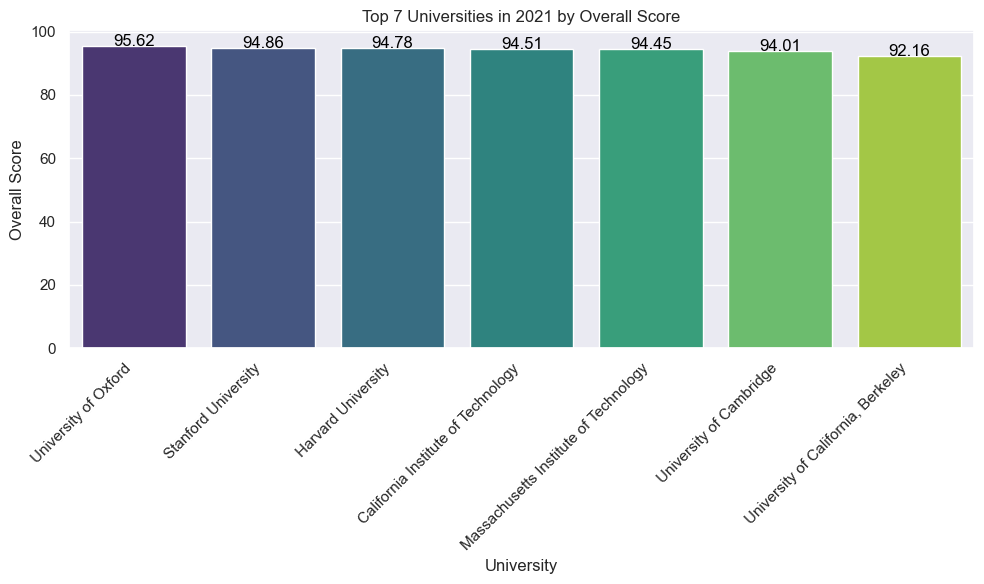

In [20]:
# Filter data for the year 2021
rankings_2021 = rankings[rankings['Year'] == 2021]

# Sort universities based on overall score
top_universities_2021 = rankings_2021.sort_values(by='Overall Score', ascending=False)

# Select the top 7 universities
top_universities_2021 = top_universities_2021.head(7)

# Plot the top 7 universities with adjusted figure size and DPI
plt.figure(figsize=(10, 6), dpi=100)
barplot = sns.barplot(x='Name', y='Overall Score', data=top_universities_2021, palette='viridis')

# Add labels to the bars
for index, row in top_universities_2021.iterrows():
    barplot.text(row['Name'], row['Overall Score'], str(round(row['Overall Score'], 2)), color='black', ha="center")

plt.title('Top 7 Universities in 2021 by Overall Score')
plt.xlabel('University')
plt.ylabel('Overall Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A line plot showing the trend of Top 7 Universities Ranked by Overall Scores over the period 2016 - 2024

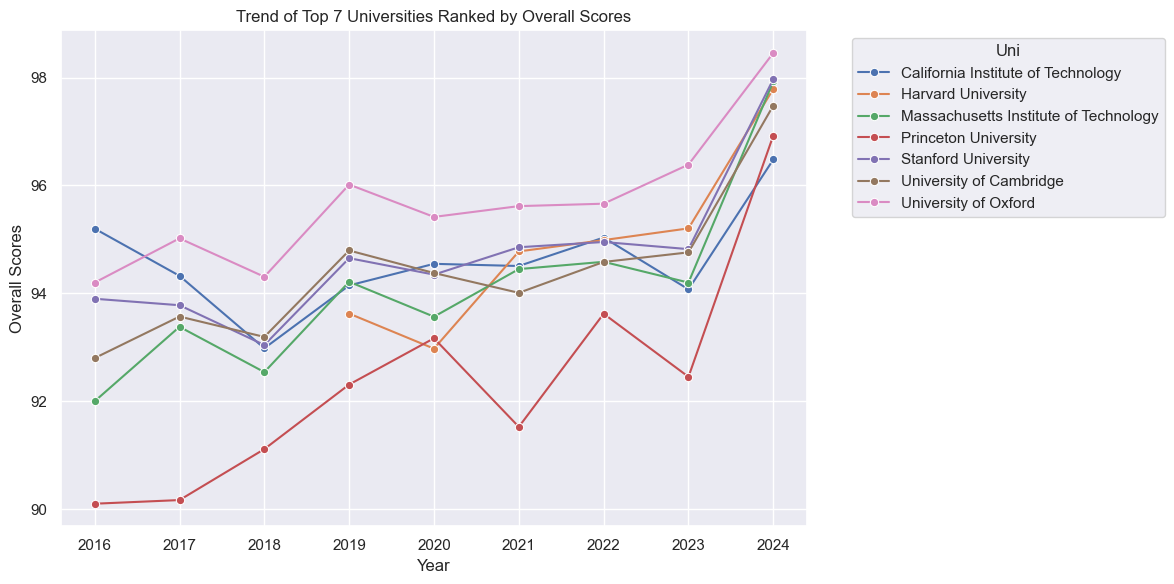

In [21]:
top_countries = rankings.groupby('Name')["Overall Score"].mean().nlargest(7).index

# Filter rankings for the top 7 countries
top_countries_rankings = rankings[rankings['Name'].isin(top_countries)]

# Group data by country and year, calculate the sum of international students
grouped_data = top_countries_rankings.groupby(['Name', 'Year'])['Overall Score'].sum().reset_index()


plt.figure(figsize=(12, 6))
for uni in grouped_data['Name'].unique():
    uni_data = grouped_data[grouped_data['Name'] == uni]
    sns.lineplot(data=uni_data, x='Year', y='Overall Score', label=uni,marker = "o")

plt.title('Trend of Top 7 Universities Ranked by Overall Scores')
plt.xlabel('Year')
plt.ylabel('Overall Scores')
plt.legend(title='Uni', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Trend of Top 7 Universities Ranked by Research Environment

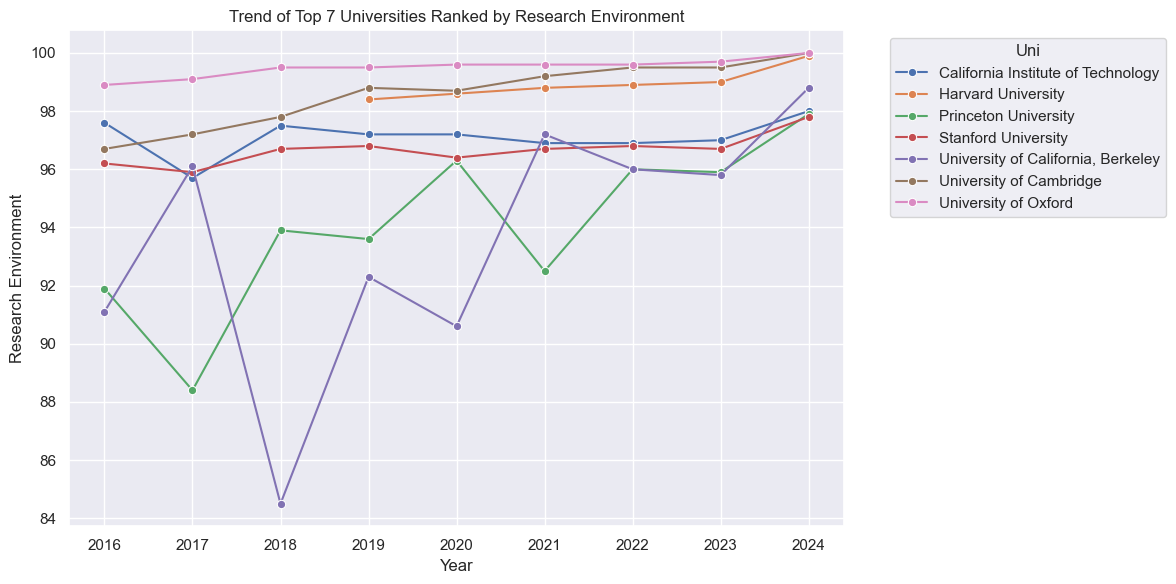

In [22]:
top_countries = rankings.groupby('Name')["Research Environment"].mean().nlargest(7).index

# Filter rankings for the top 7 countries
top_countries_rankings = rankings[rankings['Name'].isin(top_countries)]

# Group data by country and year, calculate the sum of international students
grouped_data = top_countries_rankings.groupby(['Name', 'Year'])['Research Environment'].sum().reset_index()


plt.figure(figsize=(12, 6))
for uni in grouped_data['Name'].unique():
    uni_data = grouped_data[grouped_data['Name'] == uni]
    sns.lineplot(data=uni_data, x='Year', y='Research Environment', label=uni,marker = "o")

plt.title('Trend of Top 7 Universities Ranked by Research Environment')
plt.xlabel('Year')
plt.ylabel('Research Environment')
plt.legend(title='Uni', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
rankings.columns

Index(['Rank', 'Name', 'Country', 'Student Population',
       'Students to Staff Ratio', 'Overall Score', 'Teaching',
       'Research Environment', 'Research Quality', 'Industry Impact',
       'International Outlook', 'Year', 'Female Students', 'Male Students',
       'Female to Male Ratio', 'International Students'],
      dtype='object')

Over a period of 9 years, the chart shows more balance in gender distribution in the top universities in 2024 compared to 2016

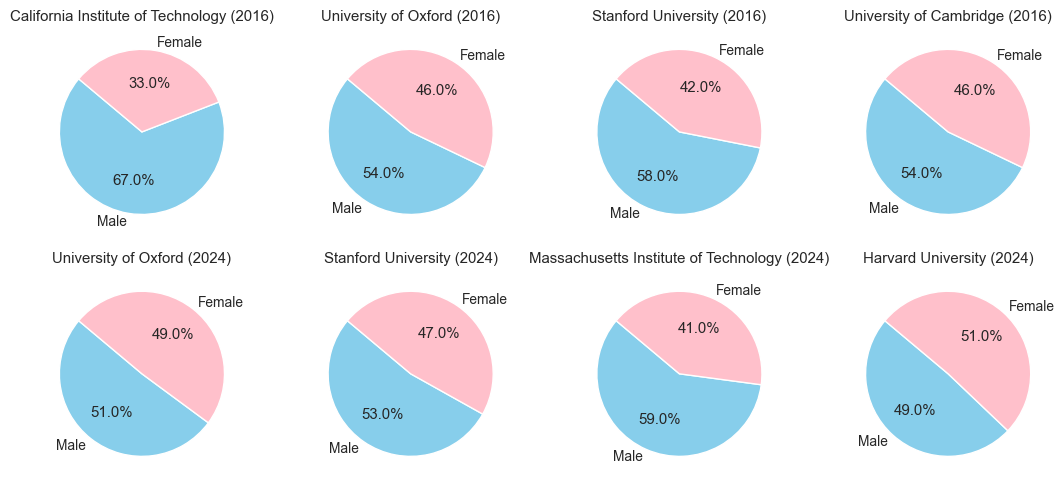

In [24]:
top_universities_2016 = rankings[(rankings['Year'] == 2016) & (rankings['Rank'] < 5)]
top_universities_2024 = rankings[(rankings['Year'] == 2024) & (rankings['Rank'] < 5)]
sns.set(font_scale=0.9)


fig, axes = plt.subplots(2, 4, figsize=(11, 5))

# Iterate over top universities in 2016
for i, (index, uni) in enumerate(top_universities_2016.iterrows()):
    # Calculate male and female counts
    male_count = uni['Male Students']
    female_count = uni['Female Students']


    axes[0, i].pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'], wedgeprops=dict(edgecolor='w'))
    axes[0, i].set_title(uni['Name'] + ' (2016)')

# Iterate over top universities in 2024
for i, (index, uni) in enumerate(top_universities_2024.iterrows()):
    # Calculate male and female counts
    male_count = uni['Male Students']
    female_count = uni['Female Students']


    axes[1, i].pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'], wedgeprops=dict(edgecolor='w'))
    axes[1, i].set_title(uni['Name'] + ' (2024)')


plt.tight_layout()
plt.show()

"Evolution of Top 5 Countries Hosting International Students" suggests a notable shift in diversity, particularly in the United Kingdom. In 2024, the United Kingdom stands out with the highest number of international students compared to 2016, indicating a significant evolution in diversity within its educational landscape.

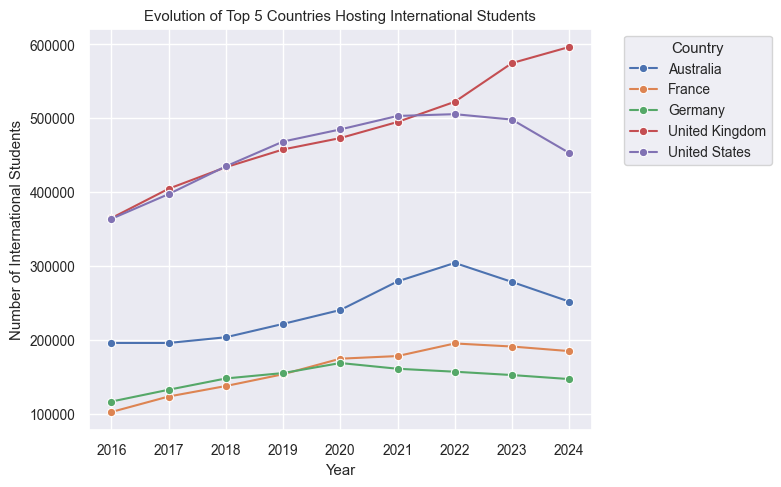

In [25]:
top_countries = rankings.groupby('Country')['International Students'].sum().nlargest(5).index

# Filter rankings for the top 5 countries
top_countries_rankings = rankings[rankings['Country'].isin(top_countries)]

# Group data by country and year, calculate the sum of international students
grouped_data = top_countries_rankings.groupby(['Country', 'Year'])['International Students'].sum().reset_index()


plt.figure(figsize=(8, 5))
for country in grouped_data['Country'].unique():
    country_data = grouped_data[grouped_data['Country'] == country]
    sns.lineplot(data=country_data, x='Year', y='International Students', label=country,marker = "o")

plt.title('Evolution of Top 5 Countries Hosting International Students')
plt.xlabel('Year')
plt.ylabel('Number of International Students')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Inspite of the United Kingdom dominating the chart for the Country with the most International Student body in its universities, in the analysis of the top 5 universities hosting international students, it was observed that only one university in the United Kingdom ranked. Australia dominated this chart with four universities.

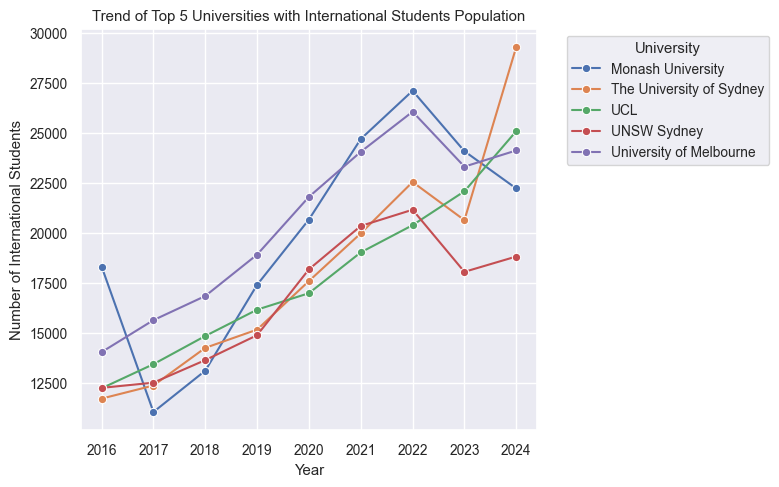

In [26]:
top_countries = rankings.groupby('Name')['International Students'].sum().nlargest(5).index

# Filter rankings for the top 5 countries
top_countries_rankings = rankings[rankings['Name'].isin(top_countries)]

# Group data by country and year, calculate the sum of international students
grouped_data = top_countries_rankings.groupby(['Name', 'Year'])['International Students'].sum().reset_index()


plt.figure(figsize=(8, 5))
for country in grouped_data['Name'].unique():
    country_data = grouped_data[grouped_data['Name'] == country]
    sns.lineplot(data=country_data, x='Year', y='International Students', label=country,marker = "o")

plt.title('Trend of Top 5 Universities with International Students Population')
plt.xlabel('Year')
plt.ylabel('Number of International Students')
plt.legend(title='University', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Scatter Plot

The scatter plot depicting the relationship between overall score and teaching quality reveals a clear linear correlation between the two variables.

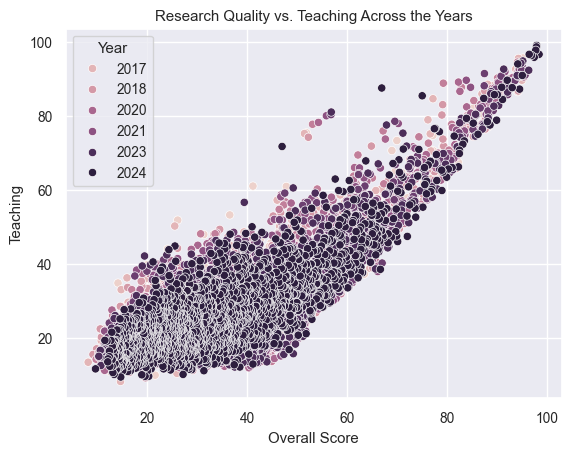

In [27]:
sns.scatterplot(data=rankings, x='Overall Score', y='Teaching', hue='Year')
plt.title('Research Quality vs. Teaching Across the Years')
plt.show()

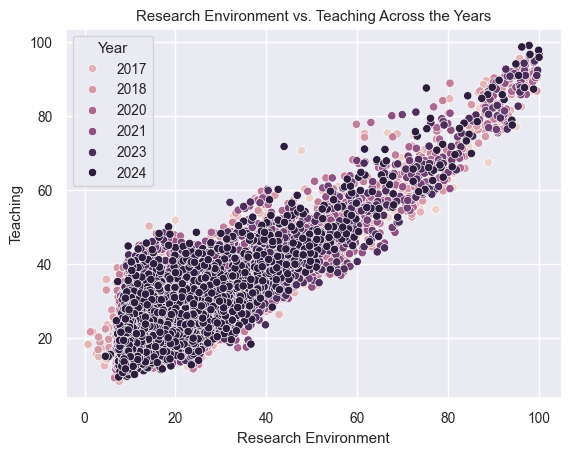

In [28]:
sns.scatterplot(data=rankings, x='Research Environment', y='Teaching', hue='Year')
plt.title('Research Environment vs. Teaching Across the Years')
plt.show()

#### Correlation 
- Overall Score, Teaching, Research Environment, and Research Quality exhibit strong correlations with each other, indicating that universities that perform well in one of these areas tend to perform well in the others too.
- Industry Impact, International Outlook, and International Students show weaker correlations with the other factors, suggesting that these aspects may not be as strongly linked to the overall performance of universities.
- Student Population and Students to Staff Ratio display the weakest correlations with the other factors, indicating that the size of the student population and population ratio may not be strongly related to other university metrics.

The correlation matrx provides valuable insights into the relationships between different factors and their impact on university performance.

<Figure size 1000x800 with 0 Axes>

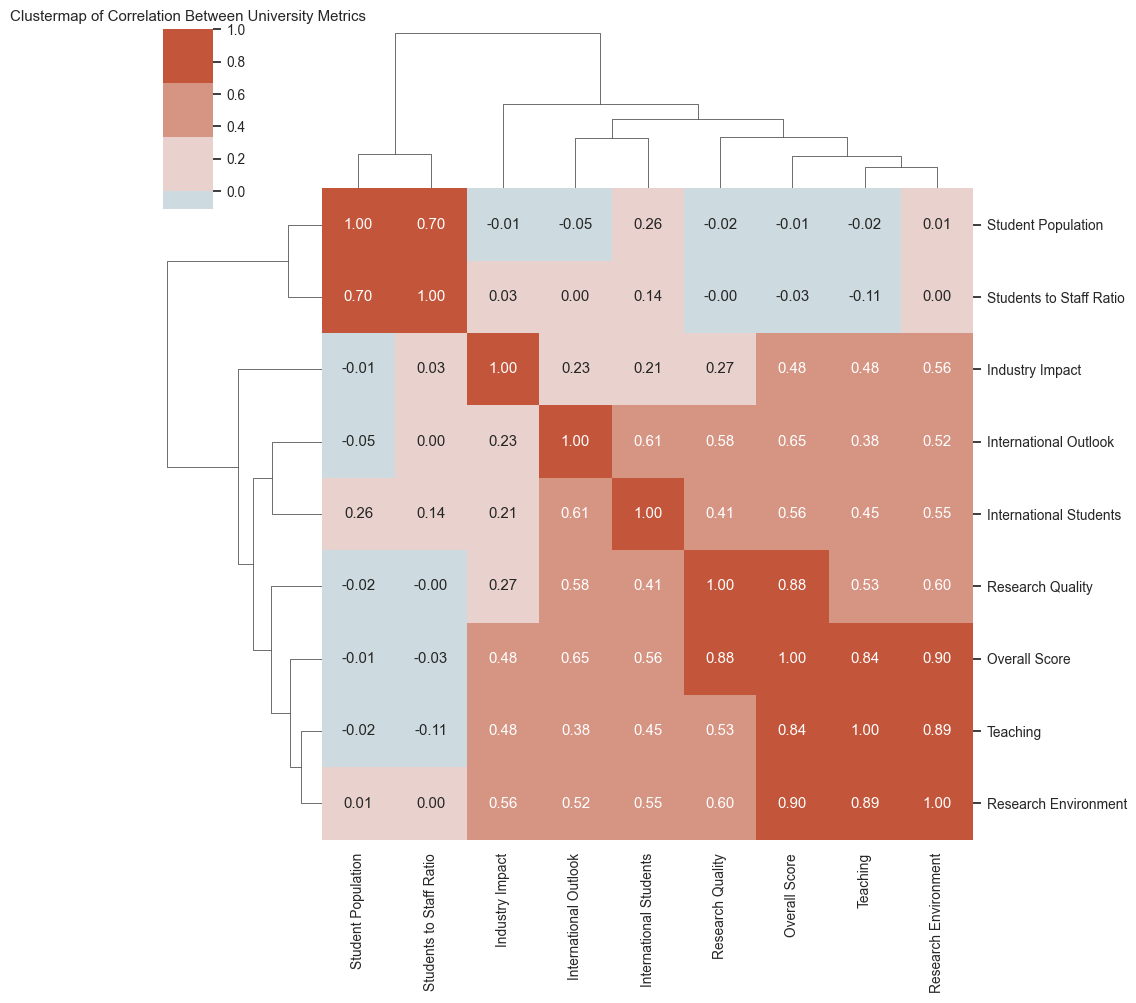

In [29]:
# Select the desired columns from the dataset
selected_columns = ['Student Population', 'Students to Staff Ratio','Overall Score', 'Teaching', 'Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook','International Students']
data_selected = rankings[selected_columns]

# Create the clustermap
plt.figure(figsize=(10,8))
sns.clustermap(data_selected.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(h_neg=220, h_pos=20), center=0)
plt.title('Clustermap of Correlation Between University Metrics')
plt.show()


#### Supervised Learning

In [30]:
# importing relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
np.unique(rankings["Rank"],return_counts=True)

# Define a function to categorize ranks
def categorize_rank(rank):
    if rank < 400:
        return "Top Ranked"
    elif rank < 800:
        return "Mid Ranked"
    else:
        return "Low Ranked"

# Apply the function to create the Rank Category column
rankings['Rank Category'] = rankings['Rank'].apply(categorize_rank)
rankings.head(2)

,Rank,Name,Country,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Students,Male Students,Female to Male Ratio,International Students,Rank Category
0,1.0,California Institute of Technology,United States,2243,6.9,95.2,95.6,97.6,99.8,97.8,64.0,2016,740.0,1503.0,49:51,583.0,Top Ranked
1,2.0,University of Oxford,United Kingdom,19920,11.6,94.2,86.5,98.9,98.8,73.1,94.4,2016,9163.0,10757.0,85:15,6773.0,Top Ranked


In [32]:
# define relevant features to be used
# split features into train and test sets to prepare for modelling

relevant_features = ['Overall Score', 'Teaching', 'Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook','International Students']
X = rankings[relevant_features]
y = rankings['Rank Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
nb_model = LogisticRegression()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Logestic Regression): {accuracy}\n{'='*70 + '>'}\nClassification Report:")

print(classification_report(y_test, y_pred))

Accuracy (Logestic Regression): 0.6617398648648649
======================================================================>
Classification Report:
              precision    recall  f1-score   support

  Low Ranked       0.76      0.78      0.77      1016
  Mid Ranked       0.48      0.42      0.45       700
  Top Ranked       0.68      0.73      0.70       652

    accuracy                           0.66      2368
   macro avg       0.64      0.64      0.64      2368
weighted avg       0.65      0.66      0.66      2368



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


While the model shows reasonable performance, there is room for improvement, especially for predicting 'Mid Ranked' universities where precision and recall are relatively lower compared to the other classes. Normalizing the data could potentially improve the model's performance by addressing differences in the scales of the features.

In [34]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


##### Logistic Regression Model

In [35]:
nb_model = LogisticRegression()
nb_model.fit(X_train_normalized, y_train)
y_pred = nb_model.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Logistic Regression): {accuracy}\n{'='*70}\nClassification Report:")

print(classification_report(y_test, y_pred))

Accuracy (Logistic Regression): 0.8340371621621622
Classification Report:
              precision    recall  f1-score   support

  Low Ranked       0.85      0.88      0.86      1016
  Mid Ranked       0.72      0.71      0.72       700
  Top Ranked       0.93      0.90      0.91       652

    accuracy                           0.83      2368
   macro avg       0.83      0.83      0.83      2368
weighted avg       0.83      0.83      0.83      2368



##### KNN Model

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=15)


knn_model.fit(X_train_normalized, y_train)


y_pred_knn = knn_model.predict(X_test_normalized)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}\n{'='*70}\nClassification Report:")

print(classification_report(y_test, y_pred_knn))

Accuracy (KNN): 0.8500844594594594
Classification Report:
              precision    recall  f1-score   support

  Low Ranked       0.85      0.92      0.88      1016
  Mid Ranked       0.77      0.71      0.74       700
  Top Ranked       0.94      0.90      0.92       652

    accuracy                           0.85      2368
   macro avg       0.85      0.84      0.85      2368
weighted avg       0.85      0.85      0.85      2368



##### Random Forest Model

In [37]:
rf_model = RandomForestClassifier(n_estimators=300,max_features='sqrt', random_state=42)
rf_model.fit(X_train_normalized, y_train)


y_pred = rf_model.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Random Forest): {accuracy}\n{'='*70}\nClassification Report:")

print(classification_report(y_test, y_pred))

Accuracy (Random Forest): 0.8619087837837838
Classification Report:
              precision    recall  f1-score   support

  Low Ranked       0.86      0.92      0.89      1016
  Mid Ranked       0.78      0.74      0.76       700
  Top Ranked       0.95      0.90      0.92       652

    accuracy                           0.86      2368
   macro avg       0.86      0.85      0.86      2368
weighted avg       0.86      0.86      0.86      2368



All three models performed relatively well in classifying universities into their respective rank categories. However, the Random Forest model showed slightly better performance compared to the logistic regression and KNN models, achieving the highest accuracy and F1-scores across all rank categories. The better performances also prove the positive effect of building models with normalized data.

#### Feature Extraction

Seeing as the random forest model performed better than both logistic and KNN model, a feature importance chart is plotted to identify the features that contribute the most to the prediction performance of the model. From the chart, the Overall Score ranked the highest making it the most important feature, and International Students the least important feature in the prediction performance of the model.

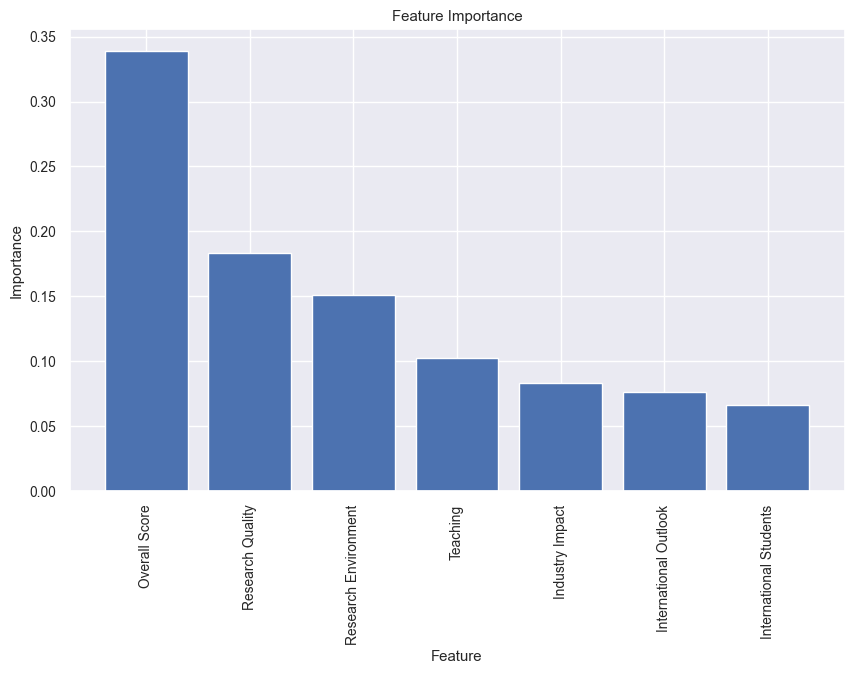

In [38]:
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()